## Regular PCC of HOPS and ER

In [1]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, sem
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [9]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\After bandpass filtering\All together"
os.chdir(folder)

lst_fname_ER = [f for f in os.listdir(".") if f.endswith("-even-bandpass.tif")]
lst_fname_condensate = [f for f in os.listdir(".") if f.endswith("-odd-bandpass.tif")]
fontsize = 18

In [10]:
# List to store Pearson correlation coefficients
lst_corr = []

for fname_ER in track(lst_fname_ER):
    fname_condensate = fname_ER.replace("-even-bandpass.tif", "-odd-bandpass.tif")
    video1 = imread(fname_condensate)
    video2 = imread(fname_ER)
    video1_flatten = video1.flatten()
    video2_flatten = video2.flatten()

    # Calculate regular Pearson correlation
    corr, _ = pearsonr(video1_flatten, video2_flatten)
    lst_corr.append(corr)

Output()

0.13300029135604877 0.015226137647432216


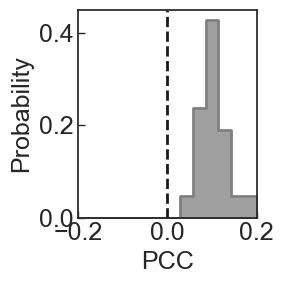

In [11]:
# Plot the histogram of Pearson correlation coefficients
pcc_abs_max = 0.2
plt.figure(figsize=(3, 3))
df = pd.DataFrame({"value": lst_corr}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=14,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.xlabel("PCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.savefig("pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight")

# Print the mean and standard error of the mean (SEM) of the Pearson correlation coefficients
print(np.mean(lst_corr), sem(lst_corr))

## Regular PCC of HOPS and Lys

In [46]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr, sem
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [47]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_Lys_dual imaging\splitted frames"
os.chdir(folder)

lst_fname_Lys = [f for f in os.listdir(".") if f.endswith("-even-bandpass.tif")]
lst_fname_condensate = [f for f in os.listdir(".") if f.endswith("-odd-bandpass.tif")]
fontsize = 18

In [48]:
# List to store Pearson correlation coefficients
lst_corr = []

for fname_Lys in track(lst_fname_Lys):
    fname_condensate = fname_Lys.replace("-even-bandpass.tif", "-odd-bandpass.tif")
    video1 = imread(fname_condensate)
    video2 = imread(fname_Lys)
    video1_flatten = video1.flatten()
    video2_flatten = video2.flatten()

    # Calculate regular Pearson correlation
    corr, _ = pearsonr(video1_flatten, video2_flatten)
    lst_corr.append(corr)

Output()

0.2093442816392803 0.03321632743270203


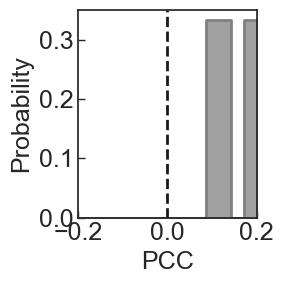

In [49]:
# Plot the histogram of Pearson correlation coefficients
pcc_abs_max = 0.2
plt.figure(figsize=(3, 3))
df = pd.DataFrame({"value": lst_corr}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=14,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.xlabel("PCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.savefig("pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight")

# Print the mean and standard error of the mean (SEM) of the Pearson correlation coefficients
print(np.mean(lst_corr), sem(lst_corr))

## Percentage colocalization between HOPS and ER

In [1]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\After bandpass filtering\All together"
os.chdir(folder)

lst_fname_ER = [f for f in os.listdir(".") if f.endswith("-even-bandpass.tif")]
lst_fname_condensate = [f for f in os.listdir(".") if f.endswith("-odd-bandpass.tif")]
fontsize = 18

In [12]:
def calculate_simple_colocalization(video1, video2):
    num_frames = video1.shape[0]  # Get the number of frames (assuming the first dimension is the frame count)
    colocalization_percentages = []  # Initialize a list to store colocalization percentages for each frame
    
    for frame in range(num_frames):  # Loop through each frame
        frame1 = video1[frame]  # Get the current frame from video1
        frame2 = video2[frame]  # Get the current frame from video2
        
        # Normalize the frames to their maximum pixel value
        frame1_norm = frame1 / np.max(frame1)
        frame2_norm = frame2 / np.max(frame2)
        
        # Apply the specified threshold for signal presence
        binary1 = frame1_norm > 0
        binary2 = frame2_norm > 0
        
        # Calculate colocalization for the current frame
        colocalization = np.sum(binary1 & binary2)
        total_signal = np.sum(binary1)
        percentage_colocalization = (colocalization / total_signal) * 100 if total_signal > 0 else 0
        
        colocalization_percentages.append(percentage_colocalization)  # Store the percentage colocalization for the current frame
    
    # Return the average colocalization percentage across all frames
    return np.mean(colocalization_percentages)

In [13]:
# List to store colocalization percentages
lst_colocalization = []

# Specify the threshold value (adjust based on your dataset)
# threshold_value = 0.02  # For high SNR, you can start around 0.05 (5%)

# Process each pair of images
for fname_ER in track(lst_fname_ER):
    fname_condensate = fname_ER.replace("-even-bandpass.tif", "-odd-bandpass.tif")
    video1 = imread(fname_condensate)
    video2 = imread(fname_ER)
    
    # Calculate colocalization percentage for each image pair
    average_percentage_colocalization = calculate_simple_colocalization(video1, video2)
    lst_colocalization.append(average_percentage_colocalization)

Output()

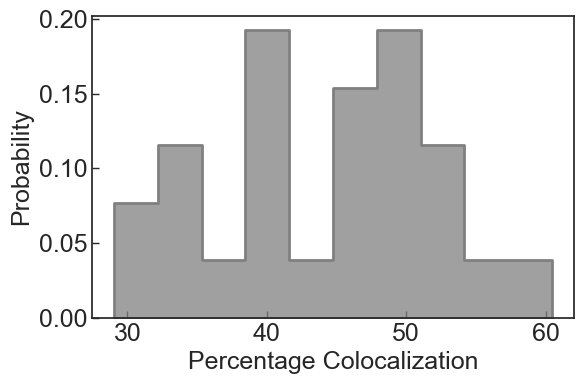

43.97870643106664 1.5931356559167222


In [11]:
# Plot the histogram of colocalization percentages
plt.figure(figsize=(6, 4))
df = pd.DataFrame({"percentage_colocalization": lst_colocalization}, dtype=float)
sns.histplot(
    data=df,
    x="percentage_colocalization",
    bins = 10,
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
# plt.axvline(0, c="k", lw=2, ls="--")
plt.xlabel("Percentage Colocalization", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.show()
print(np.mean(lst_colocalization), sem(lst_colocalization))

## Percentage colocalization between HOPS and Lysosome

In [41]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

In [42]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_Lys_dual imaging\splitted frames"
os.chdir(folder)

lst_fname_Lys = [f for f in os.listdir(".") if f.endswith("-even-bandpass.tif")]
lst_fname_condensate = [f for f in os.listdir(".") if f.endswith("-odd-bandpass.tif")]
fontsize = 18

In [43]:
def calculate_simple_colocalization(video1, video2, threshold):
    num_frames = video1.shape[0]  # Get the number of frames (assuming the first dimension is the frame count)
    colocalization_percentages = []  # Initialize a list to store colocalization percentages for each frame
    
    for frame in range(num_frames):  # Loop through each frame
        frame1 = video1[frame]  # Get the current frame from video1
        frame2 = video2[frame]  # Get the current frame from video2
        
        # Normalize the frames to their maximum pixel value
        frame1_norm = frame1 / np.max(frame1)
        frame2_norm = frame2 / np.max(frame2)
        
        # Apply the specified threshold for signal presence
        binary1 = frame1_norm > threshold
        binary2 = frame2_norm > threshold
        
        # Calculate colocalization for the current frame
        colocalization = np.sum(binary1 & binary2)
        total_signal = np.sum(binary1)
        percentage_colocalization = (colocalization / total_signal) * 100 if total_signal > 0 else 0
        
        colocalization_percentages.append(percentage_colocalization)  # Store the percentage colocalization for the current frame
    
    # Return the average colocalization percentage across all frames
    return np.mean(colocalization_percentages)

In [44]:
# List to store colocalization percentages
lst_colocalization = []

# Specify the threshold value (adjust based on your dataset)
threshold_value = 0.02  # For high SNR, you can start around 0.05 (5%)

# Process each pair of images
for fname_Lys in track(lst_fname_Lys):
    fname_condensate = fname_Lys.replace("-even-bandpass.tif", "-odd-bandpass.tif")
    video1 = imread(fname_condensate)
    video2 = imread(fname_Lys)
    
    # Calculate colocalization percentage for each image pair
    average_percentage_colocalization = calculate_simple_colocalization(video1, video2, threshold_value)
    lst_colocalization.append(average_percentage_colocalization)

Output()

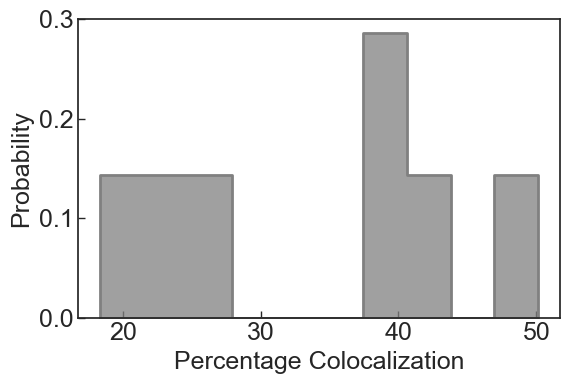

34.20974285310196 4.344492388681275


In [45]:
# Plot the histogram of colocalization percentages
plt.figure(figsize=(6, 4))
df = pd.DataFrame({"percentage_colocalization": lst_colocalization}, dtype=float)
sns.histplot(
    data=df,
    x="percentage_colocalization",
    bins = 10,
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
# plt.axvline(0, c="k", lw=2, ls="--")
plt.xlabel("Percentage Colocalization", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.tight_layout()
plt.show()
print(np.mean(lst_colocalization), sem(lst_colocalization))